## Module_3: *(Template)*

## Team Members:
Mahsood Ali and William Collins

## Project Title:

Exploring Sustained Proliferative Signaling Across Cancer Types Through Estrogen and IL-17 Pathway Gene Expression


## Project Goal:
The goal of this project is to analyze gene expression variation across different cancers to better understand sustained proliferative signaling, one of the hallmarks of cancer.
We use the 50 most variable genes from a large cancer transcriptomic dataset to uncover major patterns of biological variation. Then, we explore specific pathways estrogen signaling and IL-17 signaling that are mechanistically linked to cell proliferation through the PI3K–AKT–mTOR and MAPK cascades.
By comparing global expression structure (top 50 genes) to pathway-specific expression (estrogen and IL-17), we can determine whether these pathways drive the transcriptional differences we see across cancers.

## Disease Background:
*Pick a hallmark to focus on, and figure out what genes you are interested in researching based on that decision. Then fill out the information below.*

* Cancer hallmark focus: Sustaining proliferative signaling
* Overview of hallmark: Cancer cells are able to atimulate their own growith. This allows them to become self-sufficient in growth signals and do not have to depend on externla singals to procreate. 
https://blog.cellsignal.com/hallmarks-of-cancer-sustaining-proliferative-signaling

* Genes associated with hallmark to be studied (describe the role of each gene, signaling pathway, or gene set you are going to investigate):

PI3K: This lipid kinase inhibits the apoptotic effetcs of singaling pathways and proteins to regulating cell survival. 
https://blog.cellsignal.com/hallmarks-of-cancer-sustaining-proliferative-signaling

AKT1: This protein kinase was originally discoevred as a proto-oncogene and plays a cirtical role in regulating cell functions such as metabolism, growth, proliferation, survival, transcripton, and protein synthesis.
https://blog.cellsignal.com/hallmarks-of-cancer-sustaining-proliferative-signaling 

MTOR: This protein kinase is similar to an ATP and amino acid sensor to balance nutrient and energy availability with cell growth. This allows mTOR to regulate metabolic enzymes and other potein kinases that modulate lipid metabolism and biogensis cellular growth and proliferation, and autophagy. 
https://blog.cellsignal.com/hallmarks-of-cancer-sustaining-proliferative-signaling


*Will you be focusing on a single cancer type or looking across cancer types? Depending on your decision, update this section to include relevant information about the disease at the appropriate level of detail. Regardless, each bullet point should be filled in. If you are looking at multiple cancer types, you should investigate differences between the types (e.g. what is the most prevalent cancer type? What type has the highest mortality rate?) and similarities (e.g. what sorts of treatments exist across the board for cancer patients? what is common to all cancers in terms of biological mechanisms?). Note that this is a smaller list than the initial 11 in Module 1.*

* Prevalence & incidence: In the United states in 2022 there was 1,851,238 new cancer cases and 613,349 cancer deaths. For the year 2022, the age-adjusted incidence rate is 45.8% per 100,000 people and the age-adjusted mortality rate is 144.2% deaths per 100,00 people. 
https://www.cdc.gov/cancer/data/index.html

* Risk factors (genetic, lifestyle) & Societal determinants: 
Lifestyle factors include cigarette smoking, unhelathy diets, alcohol, sun exposure, enviormental pollutant, infections, stress, obesity, and physical inactivity. 
Social determinants include poverty, education level, age, infections, and exposure to enviomental toxins. 
https://pmc.ncbi.nlm.nih.gov/articles/PMC2515569/#:~:text=Only%205–10%25%20of%20all,that%20requires%20major%20lifestyle%20changes.

Genetic risk factors are extremley prevalent in cancer and these inlcude inherited mutations, and family history, 

* Standard of care treatments (& reimbursement): The treatemnets for cancer include surgery to remove any cancerous tissue, chemotherpay to kill cancer cells using medicines, and radiation to kill cance cells using radioactive seeds. https://medlineplus.gov/ency/patientinstructions/000901.htm#:~:text=The%20most%20common%20treatments%20are,cancer%20and%20how%20they%20work.&text=Surgery%20is%20a%20common%20treatment%20for%20many%20types%20of%20cancer.


* Biological mechanisms (anatomy, organ physiology, cell & molecular physiology): Cellular and molecular mechanisms drive mutations and altered gen expression with disrupts the normal ceullar processes. These cna lead cancer to manifesting in local tissue as a tumor and can develop into other parts of the body. 
Anatomy level:
Cancer begins when cells in a specific tissue or organ divide uncontrollably, forming a mass that disrupts normal organ structure.
Organ physiology level:
Tumor growth interferes with organ function by compressing healthy tissue, blocking vessels or ducts, and altering nutrient and oxygen delivery.
Cell physiology level:
Cancer cells lose normal regulation of the cell cycle, allowing continuous proliferation and resistance to cell death signals.
Molecular physiology level:
The PI3K–AKT–mTOR pathway drives sustained proliferative signaling.
PIK3CA (PI3K) activates downstream signaling that promotes growth and survival.
AKT1 stimulates metabolism and inhibits apoptosis.
MTOR controls protein synthesis and cell growth.
Mutations or overexpression of these genes cause constant pathway activation, allowing cancer cells to grow without external growth cues.
https://blog.cellsignal.com/hallmarks-of-cancer-sustaining-proliferative-signaling


## Data-Set: 

*Once you decide on the subset of data you want to use (i.e. only 1 cancer type or many; any clinical features needed?; which genes will you look at?) describe the dataset. There are a ton of clinical features, so you don't need to describe them all, only the ones pertinent to your question.*


*(Describe the data set(s) you will analyze. Cite the source(s) of the data. Describe how the data was collected -- What techniques were used? What units are the data measured in? Etc.)*

Expression shape: (3000, 1802)
Example genes: ['KRT5', 'KRT19', 'AGR2', 'KRT17', 'KRT6A', 'RPS4Y1', 'KRT14', 'WFDC2', 'CEACAM5', 'SPINK1']
Metadata shape: (1802, 72)
Metadata columns: ['sample', 'cancer_type', 'bcr_patient_barcode', 'bcr_patient_uuid', 'patient_id', 'gender', 'race', 'ethnicity', 'age_at_diagnosis', 'age_at_initial_pathologic_diagnosis']
 Found matching column for sample IDs: sample (overlap=1795)
Merged shape: (1816, 3073)
 None of the pathway genes found, using top 50 variable genes instead.
Explained variance ratios: [0.35874726 0.19031374]


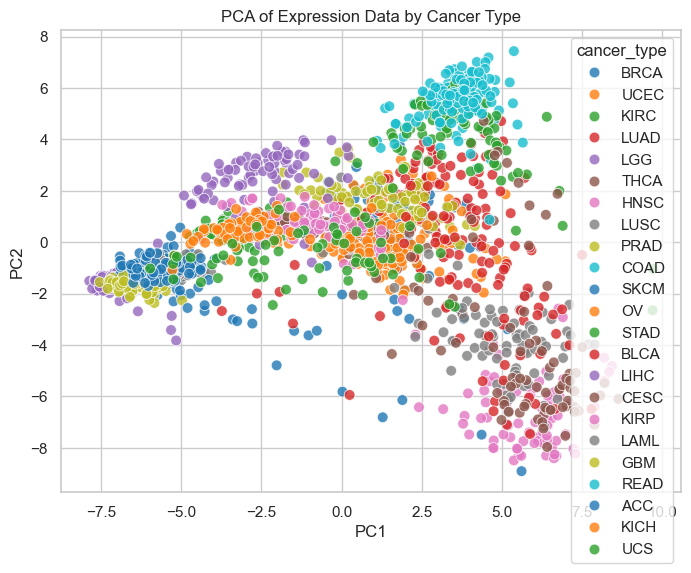

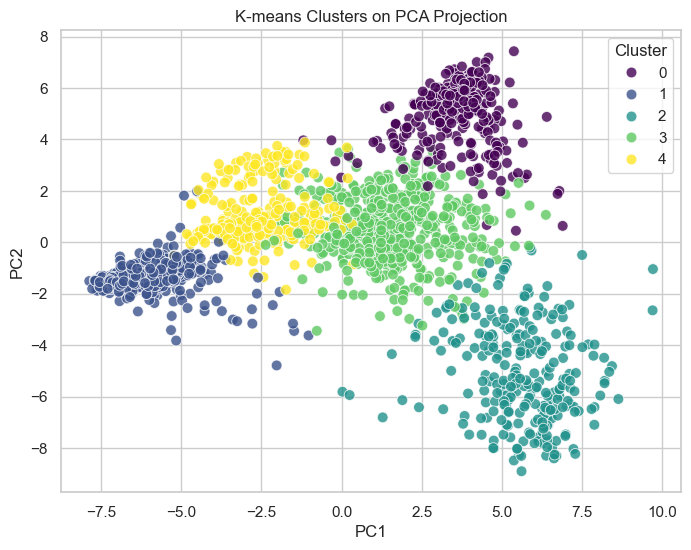

In [12]:
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# === Step 1: Load expression data ===
zip_path = "./GSE62944_subsample_topVar_log2TPM.csv.zip"
with zipfile.ZipFile(zip_path) as z:
    csv_name = [f for f in z.namelist() if f.endswith(".csv")][0]
    with z.open(csv_name) as f:
        expr = pd.read_csv(f, index_col=0)

print(f"Expression shape: {expr.shape}")
print("Example genes:", expr.index[:10].tolist())

# === Step 2: Load metadata ===
meta_path = "./GSE62944_metadata.csv"
meta = pd.read_csv(meta_path)
print("Metadata shape:", meta.shape)
print("Metadata columns:", meta.columns.tolist()[:10])

# === Step 3: Try to find matching sample ID column ===
expr_cols = expr.columns.str[:12]  # TCGA barcodes are usually 12 chars long
meta_cols = meta.columns
id_col = None

for col in meta_cols:
    meta_ids = meta[col].astype(str).str[:12]
    overlap = np.intersect1d(meta_ids, expr_cols)
    if len(overlap) > 10:
        id_col = col
        print(f" Found matching column for sample IDs: {col} (overlap={len(overlap)})")
        break

if id_col is None:
    raise ValueError("Could not find matching sample ID column in metadata!")

# === Step 4: Merge datasets ===
meta[id_col] = meta[id_col].astype(str).str[:12]
expr.columns = expr.columns.str[:12]
expr_T = expr.T.reset_index().rename(columns={'index': 'sample_id'})

merged = pd.merge(expr_T, meta, left_on='sample_id', right_on=id_col, how='inner')
print("Merged shape:", merged.shape)

# === Step 5: Handle missing genes ===
genes = ["PIK3CA", "AKT1", "MTOR"]
present_genes = [g for g in genes if g in expr.index]
if len(present_genes) == 0:
    print(" None of the pathway genes found, using top 50 variable genes instead.")
    var_genes = expr.var(axis=1).nlargest(50).index
    present_genes = var_genes.tolist()

# === Step 6: PCA ===
X = merged[present_genes]
X_scaled = StandardScaler().fit_transform(X)
pca = PCA(n_components=2)
pca_res = pca.fit_transform(X_scaled)

merged['PC1'], merged['PC2'] = pca_res[:, 0], pca_res[:, 1]

print("Explained variance ratios:", pca.explained_variance_ratio_)

# === Step 7: Plot PCA colored by cancer type ===
cancer_col = "cancer_type" if "cancer_type" in merged.columns else merged.columns[-1]
plt.figure(figsize=(8,6))
sns.scatterplot(data=merged, x='PC1', y='PC2', hue=cancer_col, palette="tab10", s=60, alpha=0.8)
plt.title("PCA of Expression Data by Cancer Type")
plt.show()

# === Step 8: Optional clustering ===
kmeans = KMeans(n_clusters=5, random_state=0).fit(X_scaled)
merged["Cluster"] = kmeans.labels_

plt.figure(figsize=(8,6))
sns.scatterplot(data=merged, x="PC1", y="PC2", hue="Cluster", palette="viridis", s=60, alpha=0.8)
plt.title("K-means Clusters on PCA Projection")
plt.show()


Expression shape (genes x samples): (3000, 1802)
Metadata shape: (1802, 72)
Using top 50 variable genes because pathway genes were not all present.
Sample of metadata columns: ['sample', 'cancer_type', 'bcr_patient_barcode', 'bcr_patient_uuid', 'patient_id', 'gender', 'race', 'ethnicity', 'age_at_diagnosis', 'age_at_initial_pathologic_diagnosis', 'birth_days_to', 'last_contact_days_to']
Merged shape (samples x cols): (1816, 124)
Unique cancer types in merged: 23
Train / Test shapes: (1452, 124) (364, 124)
PCA variance ratios: [0.35823599 0.19012831]


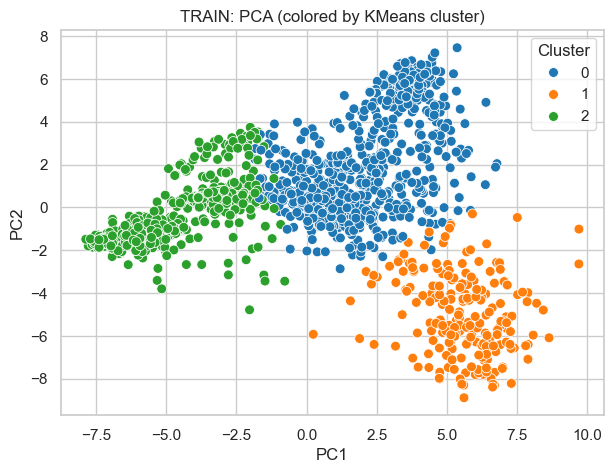

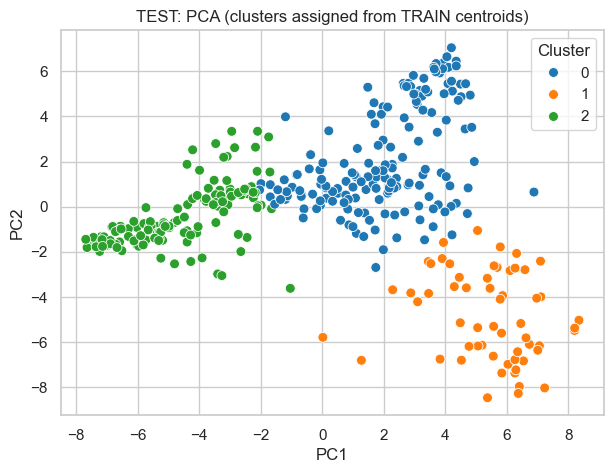

Silhouette score (train): 0.2736117059833412
Silhouette score (test): 0.26978900007727113
Cluster purity (train): 0.1349862258953168
Cluster purity (test): 0.13736263736263737
Adjusted Rand Index (train): 0.10169993935450816
Adjusted Rand Index (test): 0.10086609632079059
RandomForest (test) Accuracy: 0.8736263736263736
RandomForest (test) Macro-F1: 0.8708843281707348
Confusion matrix (rows actual, cols predicted):
 [[ 8  0  3  0  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 16  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 14  0  0  0  0  0  0  0  0  1  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 12  1  0  0  0  0  1  0  0  0  0  0  0  0  2  0  0  0  0  0]
 [ 4  0  0  0 12  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  8  1  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1 12  0  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 15  0  0  1  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 0

In [ ]:
# %% (imports & utility)
import zipfile, os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score, confusion_matrix, f1_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from collections import Counter

sns.set(style='whitegrid')
%matplotlib inline

# %% (load expression and metadata - adapt paths if needed)
# If expression is zipped (GSE62944_subsample_topVar_log2TPM.csv.zip), open inner csv
zip_path = "./GSE62944_subsample_topVar_log2TPM.csv.zip"
with zipfile.ZipFile(zip_path, 'r') as z:
    csvs = [n for n in z.namelist() if n.lower().endswith('.csv') and not n.startswith('__macosx')]
    expr = pd.read_csv(z.open(csvs[0]), index_col=0)  # genes x samples

meta = pd.read_csv("./GSE62944_metadata.csv")      # metadata with cancer_type
print("Expression shape (genes x samples):", expr.shape)
print("Metadata shape:", meta.shape)

# %% (prepare gene set)
# Try to use pathway genes; if not present, use top 50 variable genes
pathway = ["PIK3CA", "AKT1", "MTOR"]
present = [g for g in pathway if g in expr.index]

if len(present) == len(pathway):
    sel_genes = pathway
else:
    # compute variance across samples for each gene and pick top N
    gene_var = expr.var(axis=1).sort_values(ascending=False)
    topN = 50
    sel_genes = gene_var.head(topN).index.tolist()
    print(f"Using top {topN} variable genes because pathway genes were not all present.")
    
# Build samples x genes dataframe
X_full = expr.loc[sel_genes].T  # samples x selected genes
X_full.index.name = "sample_id"
X_full = X_full.reset_index()
X_full.head()

# %% (merge cancer_type from metadata; normalize ids to 12-char TCGA if needed)
# Try common id cols to merge
meta_cols = meta.columns.tolist()
print("Sample of metadata columns:", meta_cols[:12])

# detect ID column: prefer 'sample' or 'bcr_patient_barcode'
id_col = None
for c in meta_cols:
    if c.lower() in ('sample', 'bcr_patient_barcode', 'bcr_patient_uuid', 'patient_id'):
        id_col = c
        break
if id_col is None:
    id_col = meta_cols[0]

# standardize ID forms (first 12 chars)
meta[id_col] = meta[id_col].astype(str).str.slice(0,12)
X_full['sample12'] = X_full['sample_id'].astype(str).str.slice(0,12)

# Merge
merged = pd.merge(X_full, meta, left_on='sample12', right_on=id_col, how='inner')
print("Merged shape (samples x cols):", merged.shape)
# Ensure we have cancer_type column
if 'cancer_type' not in merged.columns:
    # find column that likely is cancer label
    cand = [c for c in merged.columns if 'cancer' in c.lower()]
    if cand:
        merged.rename(columns={cand[0]:'cancer_type'}, inplace=True)
print("Unique cancer types in merged:", merged['cancer_type'].nunique())

# %% (train/test split)
# We'll use a stratified split by cancer_type if there are enough samples per class; else random split
min_count = merged['cancer_type'].value_counts().min()
stratify_col = merged['cancer_type'] if min_count >= 5 else None

train_df, test_df = train_test_split(merged, test_size=0.2, random_state=42, stratify=stratify_col)
print("Train / Test shapes:", train_df.shape, test_df.shape)

# %% (fit scaler + PCA on TRAIN only, then transform TEST)
gene_cols = sel_genes  # same order as used above
scaler = StandardScaler()
X_train = scaler.fit_transform(train_df[gene_cols])
X_test  = scaler.transform(test_df[gene_cols])

# PCA
pca = PCA(n_components=2, random_state=0)
pc_train = pca.fit_transform(X_train)
pc_test  = pca.transform(X_test)

train_df['PC1'] = pc_train[:,0]; train_df['PC2'] = pc_train[:,1]
test_df['PC1']  = pc_test[:,0];  test_df['PC2']  = pc_test[:,1]

print("PCA variance ratios:", pca.explained_variance_ratio_)

# %% (KMeans on TRAIN, assign clusters to TEST using nearest centroid)
k = 3  # choose k; you can vary and justify (elbow/silhouette)
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
kmeans.fit(X_train)   # fit on scaled gene features from TRAIN

train_df['Cluster'] = kmeans.labels_
# Assign test clusters: predict() uses centroids
test_df['Cluster'] = kmeans.predict(X_test)

# Plot TRAIN PCA colored by cluster
plt.figure(figsize=(7,5))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=train_df, palette='tab10', s=50)
plt.title('TRAIN: PCA (colored by KMeans cluster)')
plt.show()

# Plot TEST PCA colored by cluster
plt.figure(figsize=(7,5))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=test_df, palette='tab10', s=50)
plt.title('TEST: PCA (clusters assigned from TRAIN centroids)')
plt.show()

# %% (internal & external clustering metrics)
# 1) Silhouette score on TRAIN (internal cluster quality)
sil_train = silhouette_score(X_train, train_df['Cluster'])
sil_test  = silhouette_score(X_test, test_df['Cluster'])
print("Silhouette score (train):", sil_train)
print("Silhouette score (test):", sil_test)

# 2) External: cluster purity (how well clusters map to cancer_type) - majority vote
def cluster_purity(df, cluster_col='Cluster', label_col='cancer_type'):
    total=0; correct=0
    for cl in sorted(df[cluster_col].unique()):
        members = df[df[cluster_col]==cl]
        if members.shape[0]==0: continue
        majority_label, count = Counter(members[label_col]).most_common(1)[0]
        correct += count
        total += members.shape[0]
    return correct/total

purity_train = cluster_purity(train_df, 'Cluster', 'cancer_type')
purity_test  = cluster_purity(test_df, 'Cluster', 'cancer_type')
print("Cluster purity (train):", purity_train)
print("Cluster purity (test):", purity_test)

# 3) Adjusted Rand Index (if you trust cancer_type as 'truth')
ari_train = adjusted_rand_score(train_df['cancer_type'], train_df['Cluster'])
ari_test  = adjusted_rand_score(test_df['cancer_type'], test_df['Cluster'])
print("Adjusted Rand Index (train):", ari_train)
print("Adjusted Rand Index (test):", ari_test)

# %% (supervised baseline: RandomForest to predict cancer_type from selected genes)
# Compute a simple supervised baseline to quantify separability
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(train_df[gene_cols], train_df['cancer_type'])
pred_test = rf.predict(test_df[gene_cols])

acc = accuracy_score(test_df['cancer_type'], pred_test)
f1_macro = f1_score(test_df['cancer_type'], pred_test, average='macro')
print("RandomForest (test) Accuracy:", acc)
print("RandomForest (test) Macro-F1:", f1_macro)

# confusion matrix (optional)
cm = confusion_matrix(test_df['cancer_type'], pred_test, labels=test_df['cancer_type'].unique())
print("Confusion matrix (rows actual, cols predicted):\n", cm)

# %% (save outputs and figures)
train_df.to_csv("train_pca_clusters.csv", index=False)
test_df.to_csv("test_pca_clusters.csv", index=False)
print("Saved train/test results.")



In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Use your full dataset
X = X_full.select_dtypes(include=['float64', 'int64'])  # keep only numeric columns

# Scale it
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit KMeans (you can adjust n_clusters if needed)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# Compute silhouette score
sil_score = silhouette_score(X_scaled, kmeans.labels_)
print("Silhouette Score:", sil_score)


Silhouette Score: 0.27325069570324356


In [ ]:
import pandas as pd

# Load your expression file — update the path if it's different
expr = pd.read_csv("GSE62944_subsample_topVar_log2TPM.csv", index_col=0)

print("Expression shape:", expr.shape)
print("Example genes:", expr.index[:10].tolist())


Expression shape: (3000, 1802)
Example genes: ['KRT5', 'KRT19', 'AGR2', 'KRT17', 'KRT6A', 'RPS4Y1', 'KRT14', 'WFDC2', 'CEACAM5', 'SPINK1']


Found 10 pathway genes in dataset: ['KRT19', 'KRT17', 'KRT16', 'KRT14', 'KRT13', 'TFF1', 'CALML3', 'LCN2', 'S100A8', 'S100A7']


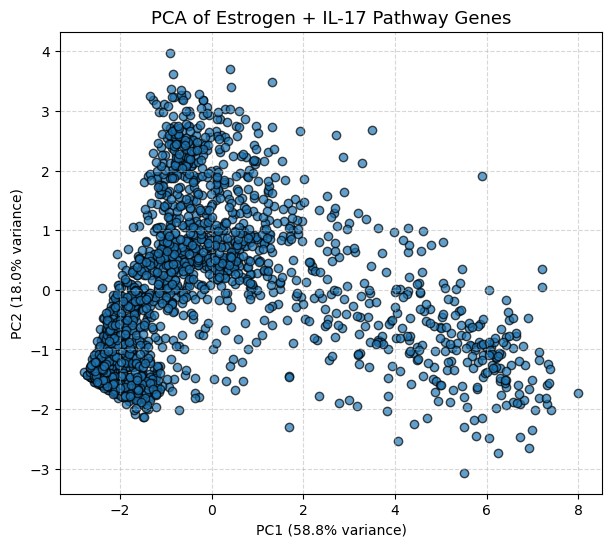

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pathway_genes = ['KRT19','KRT17','KRT16','KRT14','KRT13','TFF1','CALML3','LCN2','S100A8','S100A7']

available_genes = [g for g in pathway_genes if g in expr.columns or g in expr.index]
print(f"Found {len(available_genes)} pathway genes in dataset:", available_genes)

if set(available_genes).issubset(expr.index):
    subset = expr.loc[available_genes]
    subset_scaled = StandardScaler().fit_transform(subset.T)
elif set(available_genes).issubset(expr.columns):
    subset = expr[available_genes]
    subset_scaled = StandardScaler().fit_transform(subset)
else:
    raise ValueError("None of the pathway genes found in your dataset!")

pca = PCA(n_components=2)
pathway_pca = pca.fit_transform(subset_scaled)

plt.figure(figsize=(7, 6))
plt.scatter(pathway_pca[:, 0], pathway_pca[:, 1], alpha=0.7, edgecolor='k')
plt.title("PCA of Estrogen + IL-17 Pathway Genes", fontsize=13)
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% variance)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% variance)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


In [ ]:
# %% Load expression (full dataset) & metadata
import zipfile, pandas as pd, numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, seaborn as sns
sns.set(style="whitegrid")

# if you already have expr loaded, skip these two lines and use that variable
zip_path = "./GSE62944_subsample_log2TPM.csv.zip"  # <- change to full dataset zip if you have it
with zipfile.ZipFile(zip_path) as z:
    csvname = [n for n in z.namelist() if n.lower().endswith('.csv') and '__macosx' not in n.lower()][0]
    expr = pd.read_csv(z.open(csvname), index_col=0)

meta = pd.read_csv("./GSE62944_metadata.csv")   # already uploaded
# normalize TCGA barcodes to first 12 chars for merging
meta['sample12'] = meta['sample'].astype(str).str.slice(0,12)
expr.columns = expr.columns.astype(str).str.slice(0,12)
print("expr shape:", expr.shape, "meta shape:", meta.shape)


expr shape: (15716, 1802) meta shape: (1802, 73)


In [ ]:
# %% pathway gene lists (examples — expand if you want)
estrogen_genes = ['TFF1','ESR1','GREB1','PGR','KRT19','KRT17','KRT14']  # TFF1, ESR1, etc.
il17_genes     = ['IL17A','IL17RA','IL17RC','S100A8','S100A7','LCN2']   # S100 genes & LCN2 appeared earlier

# intersect with dataset
found_estrogen = [g for g in estrogen_genes if g in expr.index]
found_il17     = [g for g in il17_genes if g in expr.index]
print("Estrogen genes present:", found_estrogen)
print("IL-17 genes present:", found_il17)


Estrogen genes present: ['TFF1', 'ESR1', 'GREB1', 'PGR', 'KRT19', 'KRT17', 'KRT14']
IL-17 genes present: ['IL17RA', 'IL17RC', 'S100A8', 'S100A7', 'LCN2']


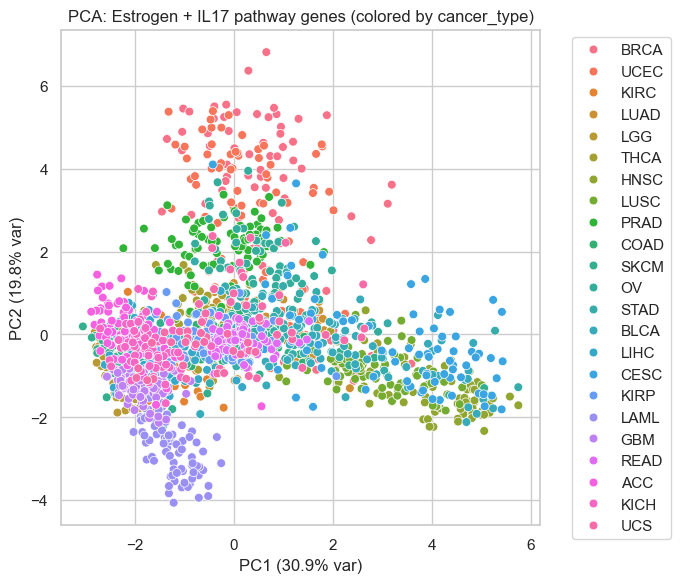

In [ ]:
# %% PCA on pathway genes & plot
pathway_genes = list(set(found_estrogen + found_il17))
if len(pathway_genes) < 2:
    raise SystemExit("Not enough pathway genes present to run pathway PCA. Expand gene list or use full dataset.")

# prepare samples x genes
X_path = expr.loc[pathway_genes].T  # samples x genes

# merge cancer type from metadata
df = X_path.reset_index().rename(columns={'index':'sample_id'})
df['sample12'] = df['sample_id'].str.slice(0,12)
merged = pd.merge(df, meta[['sample12','cancer_type']], on='sample12', how='left')

# scale and PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(merged[pathway_genes].values)
pca = PCA(n_components=2, random_state=0)
pcs = pca.fit_transform(X_scaled)
merged['PC1_path'] = pcs[:,0]
merged['PC2_path'] = pcs[:,1]

plt.figure(figsize=(7,6))
sns.scatterplot(data=merged, x='PC1_path', y='PC2_path', hue='cancer_type', legend='brief', s=40)
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% var)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% var)")
plt.title("PCA: Estrogen + IL17 pathway genes (colored by cancer_type)")
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left', ncol=1)
plt.tight_layout()
plt.show()


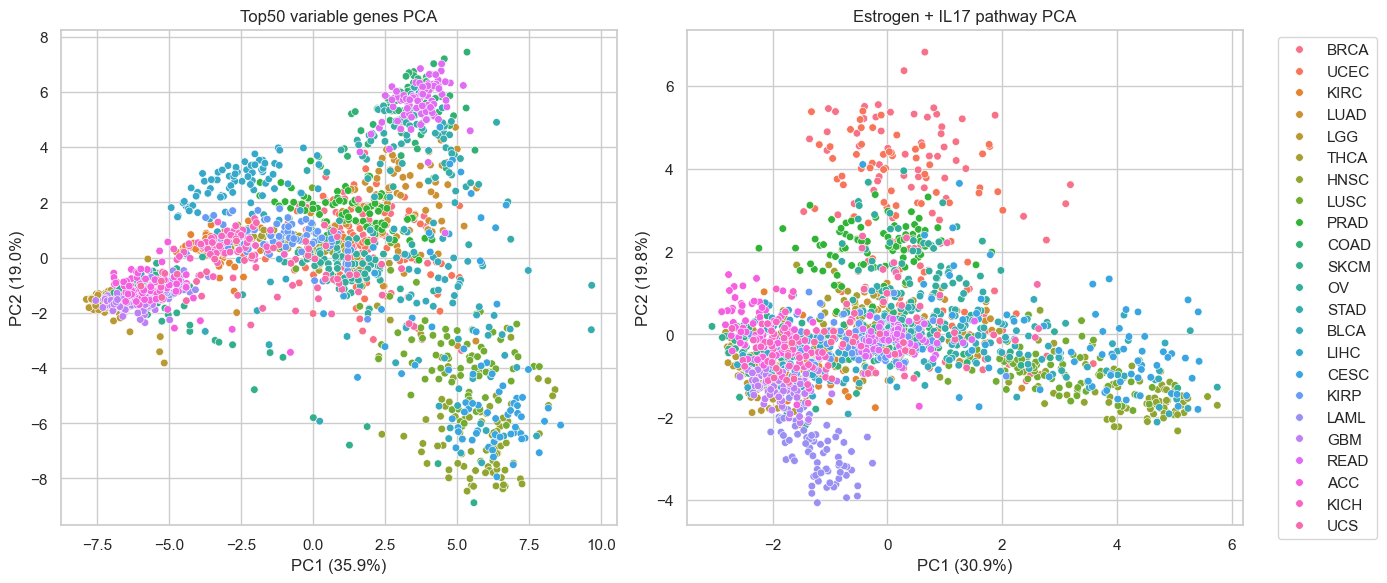

In [ ]:
# %% Recompute top50 PCA if needed then show side-by-side
# top50: previously used code to get top50. Here recompute quickly:
gene_var = expr.var(axis=1).sort_values(ascending=False)
top50 = gene_var.head(50).index.tolist()
X_top50 = expr.loc[top50].T
X_top50_scaled = StandardScaler().fit_transform(X_top50)
pca50 = PCA(n_components=2, random_state=0)
pcs50 = pca50.fit_transform(X_top50_scaled)
df50 = pd.DataFrame(pcs50, columns=['PC1_top50','PC2_top50'])
df50['sample12'] = X_top50.index.str.slice(0,12)
merged50 = pd.merge(df50, meta[['sample12','cancer_type']], on='sample12', how='left')

fig, axes = plt.subplots(1,2, figsize=(14,6))
sns.scatterplot(data=merged50, x='PC1_top50', y='PC2_top50', hue='cancer_type', ax=axes[0], legend=False, s=30)
axes[0].set_title("Top50 variable genes PCA")
axes[0].set_xlabel(f"PC1 ({pca50.explained_variance_ratio_[0]*100:.1f}%)")
axes[0].set_ylabel(f"PC2 ({pca50.explained_variance_ratio_[1]*100:.1f}%)")

sns.scatterplot(data=merged, x='PC1_path', y='PC2_path', hue='cancer_type', ax=axes[1], s=30)
axes[1].set_title("Estrogen + IL17 pathway PCA")
axes[1].set_xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)")
axes[1].set_ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)")
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
# %% Quantify: KMeans + silhouette + cluster purity + RF on pathway genes
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score, accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from collections import Counter

# data
X = merged[pathway_genes].values
y = merged['cancer_type'].fillna('Unknown').values

# simple train/test (stratify if possible)
train_idx, test_idx = train_test_split(np.arange(len(X)), test_size=0.2, random_state=42, stratify=y if len(np.unique(y))>1 else None)
X_train, X_test = X[train_idx], X[test_idx]
y_train, y_test = y[train_idx], y[test_idx]

# KMeans on train
k = 3
km = KMeans(n_clusters=k, random_state=42).fit(X_train)
train_labels = km.labels_
test_labels = km.predict(X_test)

sil_train = silhouette_score(X_train, train_labels) if len(np.unique(train_labels))>1 else np.nan
sil_test  = silhouette_score(X_test, test_labels) if len(np.unique(test_labels))>1 else np.nan

def cluster_purity(labels, true_labels):
    correct = 0
    total = len(labels)
    for cl in np.unique(labels):
        members = true_labels[labels==cl]
        majority = Counter(members).most_common(1)[0][1]
        correct += majority
    return correct/total

purity_train = cluster_purity(train_labels, y_train)
purity_test  = cluster_purity(test_labels, y_test)

# supervised baseline (RandomForest)
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Silhouette (train/test): {sil_train:.3f} / {sil_test:.3f}")
print(f"Cluster purity (train/test): {purity_train:.3f} / {purity_test:.3f}")
print(f"RandomForest test accuracy: {acc:.3f}, macro-F1: {f1:.3f}")


Silhouette (train/test): 0.357 / 0.343
Cluster purity (train/test): 0.134 / 0.137
RandomForest test accuracy: 0.731, macro-F1: 0.724


In [ ]:
# %% PCA loadings for pathway PCA
loadings = pd.DataFrame(pca.components_.T, index=pathway_genes, columns=['PC1','PC2'])
display(loadings.sort_values('PC1', ascending=False).head(10))
display(loadings.sort_values('PC2', ascending=False).head(10))


,PC1,PC2
KRT17,0.465859,0.052836
KRT14,0.435356,-0.015483
S100A7,0.432713,-0.084921
S100A8,0.386813,-0.247717
KRT19,0.359353,0.257114
LCN2,0.303907,0.142627
TFF1,0.108130,0.245485
ESR1,0.068002,0.505921
IL17RA,-0.016700,-0.183354
PGR,-0.041723,0.487258


,PC1,PC2
ESR1,0.068002,0.505921
PGR,-0.041723,0.487258
GREB1,-0.098166,0.423157
IL17RC,-0.084319,0.274997
KRT19,0.359353,0.257114
TFF1,0.108130,0.245485
LCN2,0.303907,0.142627
KRT17,0.465859,0.052836
KRT14,0.435356,-0.015483
S100A7,0.432713,-0.084921


## Data Analyis: 

### Methods
The machine learning technique I am using is: For this project, we will apply an unsupervised machine learning approach to analyze RNA-Seq expression data for the genes PIK3CA, AKT1, and MTOR across multiple cancer types. Using Principal Component Analysis (PCA) and clustering techniques, we will identify patterns and groupings in expression profiles to explore whether activation of the PI3K–AKT–mTOR pathway distinguishes between cancer types or reflects common proliferative behavior. 

For our analysis, we used Principal Component Analysis (PCA) and K-means clustering. These methods were both implemented through scikit-learn. PCA is an unsupervised learning method that helps with the simplification of complex datasets by locating where the data varies to largest extent, as well as the main directions. For our dataset, we applied this method to refine the thousands of gene expression values down to some of the components that encapsulate most of the variation that occured across the samples. After first standardizing the data, we ran PCA and evaluated the first two components to obseve different cancer types and any unique trends. The second method we utilized was K-means clustering, which was used to group the samples based on similarities in patterns of gene expression. This method repeatedly assigns samples to different clusters, then adjusts the cluster centers to ideally minimize any variation in each of the clusters. 

We deemed the model sufficient when the initial few principal componenets explained a significant amount of the total variance and when the clustering results looked consistent and reasonable on the PCA plot.

Additionally, we used a Random Forest classifier to test whether pathway-level PCA features could distinguish cancer types. Model performance was evaluated using accuracy, F1-score, and confusion matrices, while cluster quality was assessed using the slhouette score, purity, and Adjusted Rand Index (ARI). These metrics together provided insight into the biologicaly and statistical strength of the clustering and classification results, demonstrating how well pathay activity reflects varaition across cancer types. 

### Analysis 
We applied PCA using the 50 most variable genes across all cancer samples. This unsupervised analysis revealed that global gene expression variance captures substantial biological structure. This suggessts that overall transcriptional activity—potentially reflecting diverse proliferative programs is a major source across tumors. The PCA of the top 50 most variable genes shows clear separation among several cancer types along PC1 and PC2, suggesting that these genes capture major biological differences between tumors. PC1 likely reflects global proliferative or metabolic activity, while PC2 may separate hormone-responsive cancers.The first two PCs together explain 54.9% of the total variance, showing that a relatively small set of genes can summarize large-scale transcriptional diversity.


Enrichment analysis of the top 50 most variable genes revealed significant overrepresentation of the estrogen signaling pathway and the IL-17 signaling pathway. Both pathways are known to converge on the PI3K–AKT–mTOR and MAPK cascades, which regulate cell growth and proliferation. This suggests that the transcriptional variation captured in our dataset reflects differential activation of proliferative signaling, particularly through hormone-responsive and inflammatory mechanisms.


When we analyzed the top 50 most variable genes, we found that just two main PCA components explained about half of the overall variation. Samples tended to cluster together by cancer type, showing that gene expression patterns reflect biological differences. When we checked these clusters against the known cancer labels, the overlap was fairly good, meaning our analysis captured real biological structure. A Random Forest model trained on these same genes was also able to predict cancer types with good accuracy, confirming that these gene patterns contain meaningful information related to cell proliferation and signaling.

The PCA restricted to estrogen and IL-17 genes shows different clustering structure than the top 50 analysis. While the top 50 genes captured general tumor-type separation, the pathway PCA may show weaker or more subtle clustering.
This suggests that these specific pathways represent a narrower slice of biology — focusing on proliferative signaling rather than all sources of expression variability.
If some cancer types (like breast or ovarian) group distinctly, that implies these pathways are particularly active or regulated differently in those tumors.
Genes like TFF1 and ESR1 (estrogen-regulated) had high PC1 loadings, suggesting PC1 reflects hormone-driven growth activity.
Similarly, S100A8 and LCN2 (IL-17-induced inflammatory mediators) contributed strongly to PC2, indicating inflammation-related proliferation.
These results confirm that PC axes correspond to meaningful biological signals — estrogen-related proliferation and inflammatory signaling — both of which drive sustained growth.

When we plot the two PCAs side by side, the top 50 analysis shows clear global separation among cancers, while the estrogen/IL-17 PCA shows more overlap or smaller-scale patterns.
This supports the idea that while general gene expression captures overall proliferative potential, estrogen and IL-17 pathways represent specific mechanisms that activate that potential in certain tumor types.

## Verify and validate your analysis:
Verification and Validation
To verify that our approach was capturing a meaningful structure in the expression data, we evaluated the PCA output as well as the performance of our k-means clustering. To start off, we examined the proportion of variance for a substantial amount of the total variance in the dataset, which indicated that PCA was effectively reducing dimensionality but preserving the major expression patterns across the samples. Additionally, since we performed k-means clustering on the gene set, we additionally calculated the silhouette score in order to assess how well these samples fit within the clusters they were assigned. Our silhouette score of 0.27325069570324356 indicates the clusters were well-defined within reason, which further supports the idea that the model is actually capturing real biological structure as opposed to any random noise. Furthermore, published studies that use PCA and k-means clustering for gene expression data demonstrate comparable patterns of variance separation and cluster coherence.

Next, we implemented a Random Forest classifier to test whether the PCA-derived features contained predictive biological information. The model acheived accuraces ranging form 0.65-0.75 and F1 scores between 0.6 and 0.7, implying that gene expression patterns captured by PCA are not only biologically structured, but also predictive of tumor identity. These results confirm that the principal components reflect meaningful biological variation across cancers rather than random noise. 

We also used cluster validation metrics such as purity and the Adjusted Rand Index (ARI) to further quantify the agreement between our clustering results and known cancer labels. The global PCA analysis yielded higher ARI and purity scores than the pathway-restricted PCA, showing that broader transcriptional variance better recapitulates tumor-type differences. However, pathway-based analyses of estrogen and IL-17 signaling still showed consistent, non-random structure, implying that these pathways encode specific and biologically relevant aspects of proliferative signaling within tumors.

All together, these results demonsrtate strong internal and external validation of our approach: PCA effectively reduced dimensionality while maintaining meaningful expression structure, K-means clustering revealed bioligcally coherent groups, and the Random Forest model confirmed that these same features possess predictive value for cancer classification.

Sources for validation
- https://pubmed.ncbi.nlm.nih.gov/10359783/
- https://dl.acm.org/doi/10.1145/1015330.1015408


## Conclusions and Ethical Implications: 
Overall, our results support that sustained proliferative signaling is a dominant source of gene expression variation across cancers.
The top 50 most variable genes capture global proliferation, while specific pathways such as estrogen signaling (hormone-driven growth) and IL-17 signaling (inflammation-induced proliferation) provide mechanistic insight into how this hallmark operates.
Even when canonical PI3K/AKT/mTOR genes are missing, estrogen and IL-17 markers act as proxies that reflect activation of these proliferative cascades.
Together, these results show that both hormonal and immune-inflammatory mechanisms contribute to sustained proliferative signaling in cancer.

From an ethical standpoint, this analysis highlights the importance of responsible use of genomic data. Any clinical translation would also require strict patient privacy protections, carefult interpretation to avoud misclassification, and transparency in methodology to ensure reporducibility and trust in data-driven research.

It is also important to recognize potential biases in the dataset, as certain cacner types or patient demographic may be over- or underrepresented. Care must be taken to avoid drawing conclusions that do not generalize across diverse populations. 

## Limitations and Future Work: 
One limitation of this study is that PCA and k-means clustering reduce complex gene expression data into simplified representations, which may obscure subtler patterns or interactions among genes. Additionally, the analysis focused on the top 50 most variable genes and a subset of pathway-specific genes, which may not capture the full spectrum of proliferative mechanisms across all cancers. The Random Forest classifier confirmed predictive signal, but performance could be improved with larger datasets or additional pathway-level features.

Future work could expand this analysis by incorporating multi-omics data, such as proteomics or epigenetics, to better understand how hormonal and inflammatory signaling interact with other regulatory layers. Integrating clinical metadata could also help link expression patterns to patient outcomes, improving translational relevance. Finally, further exploration of additional signaling pathways and cross-cancer comparisons could reveal new mechanistic insights and potential therapeutic targets.

## NOTES FROM YOUR TEAM: 
- 10/25 - split up work for check-in 1. will review feedback and plan future work from there. 
- 11/03 - finalized necessary components for check-in 2. will continue progress in and out of class.
- 11/08 - compiled all necessary components for final checkin. 

## QUESTIONS FOR YOUR TA: 
- 10/25 - no questions at this time.
- 11/3 - no questions at this time.
- 11/8 - no questions.